In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm

In [82]:
#Importing the dataset which we will use for the modelling 
os.chdir(r'C:\Users\saura\A.Saurav\M10.Classification\Case_study\Logistic_regression')
data = pd.read_csv('Churn_Modelling.csv')


In [83]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00            1.0          1               1   
1     1.0   83807.86            1.0          0               1   
2     8.0  159660.80            3.0          1               0   
3     1.0       0.00            2.0          0               0   
4     2.0  125510.82            1.0          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3              NaN       0  
4              NaN       0

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              9992 non-null   float64
 7   Tenure           9994 non-null   float64
 8   Balance          9992 non-null   float64
 9   NumOfProducts    9991 non-null   float64
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9992 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [85]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                8
Tenure             6
Balance            8
NumOfProducts      9
HasCrCard          0
IsActiveMember     0
EstimatedSalary    8
Exited             0
dtype: int64

In [86]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [87]:
data = data.drop(['RowNumber','Surname','CustomerId'], axis =1)

In [88]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [89]:
len(data.columns)

11

In [9]:
data.head()

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female  42.0     2.0       0.00            1.0   
1          608     Spain  Female  41.0     1.0   83807.86            1.0   
2          502    France  Female  42.0     8.0  159660.80            3.0   
3          699    France  Female  39.0     1.0       0.00            2.0   
4          850     Spain  Female  43.0     2.0  125510.82            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0              NaN       0  
4          1               1              NaN       0

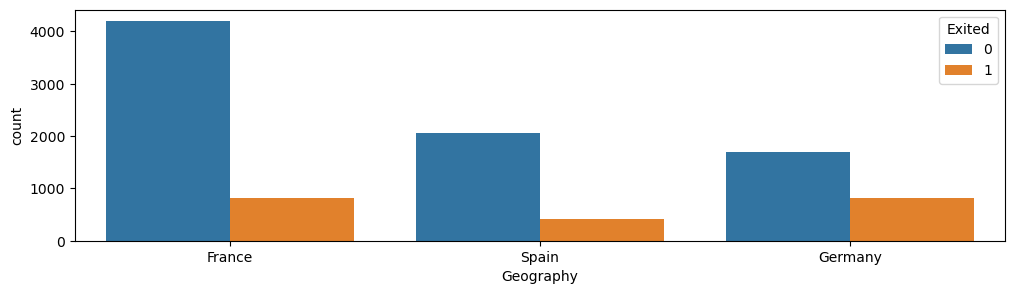

In [90]:
plt.figure(figsize =(12,3))
sns.countplot(data = data , x ='Geography', hue = 'Exited' )
plt.show()

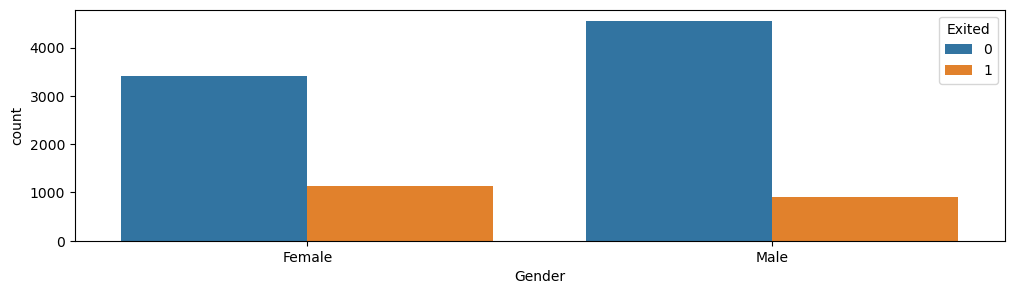

In [12]:
plt.figure(figsize =(12, 3))
sns.countplot(data = data , x = 'Gender', hue= 'Exited')
plt.show()

C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


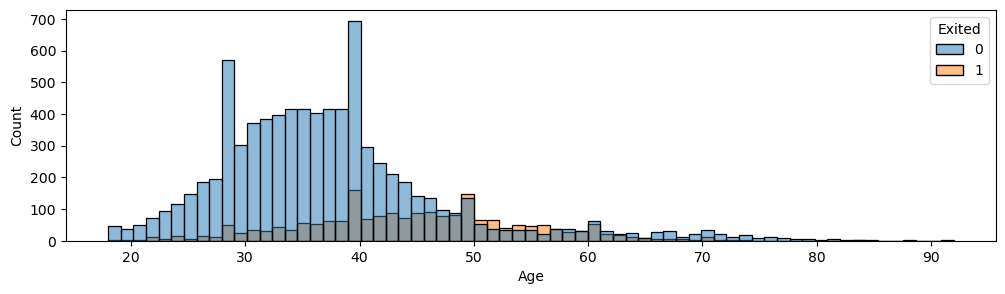

In [13]:
plt.figure(figsize = (12,3))
sns.histplot(data = data , x ='Age', hue = 'Exited')
plt.show()

C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Tenure', ylabel='Count'>

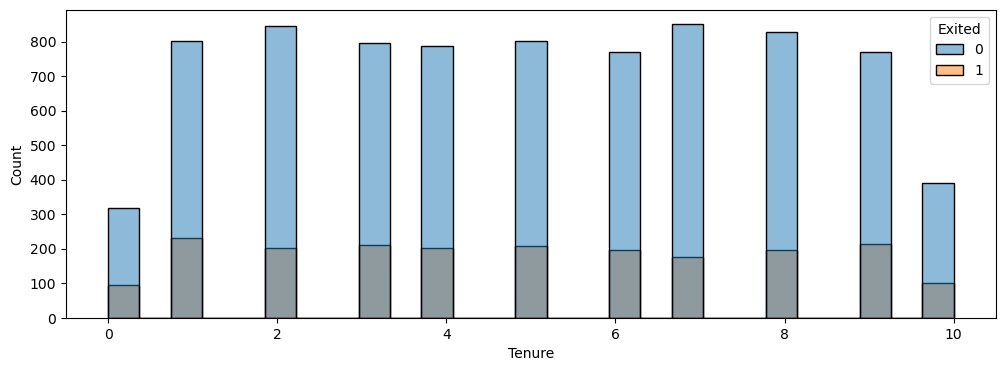

In [14]:
plt.figure(figsize = (12,4))
sns.histplot(data = data , x = 'Tenure', hue = 'Exited')

In [39]:
data['Tenure'].value_counts()

Tenure
2.0     1047
1.0     1035
7.0     1027
8.0     1025
5.0     1012
3.0     1007
4.0      989
9.0      983
6.0      967
10.0     490
0.0      412
Name: count, dtype: int64

In [40]:
pd.crosstab(data['Tenure'], data['Geography'], margins = True)

Geography  France  Germany  Spain   All
Tenure                                 
0.0           204      105    103   412
1.0           529      264    242  1035
2.0           525      274    248  1047
3.0           491      260    256  1007
4.0           512      232    245   989
5.0           485      259    268  1012
6.0           503      227    237   967
7.0           551      225    251  1027
8.0           465      264    296  1025
9.0           503      269    211   983
10.0          243      128    119   490
All          5011     2507   2476  9994

In [42]:
data.isnull().sum()/len(data)*100

CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.08
Tenure             0.06
Balance            0.08
NumOfProducts      0.09
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.08
Exited             0.00
dtype: float64

In [ ]:
#columns classification

In [14]:
data.head()

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female  42.0     2.0       0.00            1.0   
1          608     Spain  Female  41.0     1.0   83807.86            1.0   
2          502    France  Female  42.0     8.0  159660.80            3.0   
3          699    France  Female  39.0     1.0       0.00            2.0   
4          850     Spain  Female  43.0     2.0  125510.82            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0              NaN       0  
4          1               1              NaN       0

In [91]:
def data_types(df):
    
    numeric = []
    categoric = []
    
    for i in df.columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            numeric.append(i)
        else:
            categoric.append(i)
    return numeric, categoric
    
numerical, categorical = data_types(data)

In [92]:
print(numerical)
print(categorical)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
['Geography', 'Gender']


In [93]:
def binary_col(df):
    binary =[]
    for i in df.select_dtypes(include =['int', 'float']).columns:
        unique_values = df[i].unique()
        if np.in1d(unique_values, [0,1]).all():
            binary.append(i)
    return binary

binary = binary_col(data)
    

In [94]:
binary

['HasCrCard', 'IsActiveMember', 'Exited']

In [95]:
print(numerical)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [96]:
numerical = [i for i in numerical if i not in binary]
numerical

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
#missing value treatment

In [97]:
def missing_treat(data, numerical, categorical):
    
    for i in numerical:
        data[i] = data[i].fillna(data[i].median())
    for i in categorical:
        data[i] = data[i].fillna(data[i].mode()[0])
    return data

data = missing_treat(data, numerical, categorical)

In [98]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [99]:
data.head()


CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female  42.0     2.0       0.00            1.0   
1          608     Spain  Female  41.0     1.0   83807.86            1.0   
2          502    France  Female  42.0     8.0  159660.80            3.0   
3          699    France  Female  39.0     1.0       0.00            2.0   
4          850     Spain  Female  43.0     2.0  125510.82            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0        100238.11       0  
4          1               1        100238.11       0

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
#encoding and scalling

def encode(data, categorical):
    
    for i in categorical:
        data[i] = data[i].astype('category')
        data[i] = data[i].cat.codes
    return data
data = encode(data, categorical)

sc = StandardScaler()
def scalled(data, numerical):
    
    data[numerical] = sc.fit_transform(data[numerical])
    return data
data = scalled(data, numerical)
    

In [102]:
data.head()

CreditScore  Geography  Gender       Age    Tenure   Balance  \
0    -0.326221          0       0  0.293717 -1.042355 -1.226579   
1    -0.440036          2       0  0.198323 -1.388261  0.117023   
2    -1.536794          0       0  0.293717  1.033084  1.333091   
3     0.501521          0       0  0.007536 -1.388261 -1.226579   
4     2.063884          2       0  0.389110 -1.042355  0.785601   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0      -0.910592          1               1         0.021677       1  
1      -0.910592          0               1         0.216363       0  
2       2.530799          1               0         0.240521       1  
3       0.810103          0               0         0.002358       0  
4      -0.910592          1               1         0.002358       0

In [103]:
x = data.iloc[: , 0:10]
y = data.iloc[:, -1]

x = sm.add_constant(x)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , random_state = 123, test_size =0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [104]:
log_model = sm.Logit(y_train, x_train).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.436229
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7989
Method:                           MLE   Df Model:                           10
Date:                Sat, 25 Jan 2025   Pseudo R-squ.:                  0.1351
Time:                        10:25:27   Log-Likelihood:                -3489.8
converged:                       True   LL-Null:                       -4034.9
Covariance Type:            nonrobust   LLR p-value:                7.079e-228
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8808      0.073    -11.991      0.000      -1.025      -0.737
CreditScore        -0.0735      0.030     -2.458      0.014      -0.132      -0.015
Geography           0.0888      0.037      2.411      0.016       0.017       0.161
Gender             -0.5255      0.060     -8.720      0.000      -0.644      -0.407
Age                 0.7422      0.030     25.081      0.000       0.684       0.800
Tenure             -0.0613      0.030     -2.044      0.041      -0.120      -0.003
Balance             0.3342      0.032     10.433      0.000       0.271       0.397
NumOfProducts       0.0032      0.030      0.107      0.915      -0.055       0.062
HasCrCard           0.0159      0.066      0.241      0.810      -0.113       0.145
IsActiveMember     -1.0345      0.064    -16.268      0.000      -1.159      -0.910
EstimatedSalary     0.0224      0.030      0.743      0.457      -0.037       0.081
===================================================================================
"""

In [105]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [106]:
log_model.aic


7001.666189062389

In [107]:
odds = pd.DataFrame(np.exp(log_model.params), columns = ['odds'])
odds

odds
const            0.414431
CreditScore      0.929104
Geography        1.092859
Gender           0.591244
Age              2.100511
Tenure           0.940532
Balance          1.396886
NumOfProducts    1.003212
HasCrCard        1.016030
IsActiveMember   0.355403
EstimatedSalary  1.022657

In [108]:
y_pred_prob = log_model.predict(x_test)
y_pred_prob.head()

2656    0.070013
445     0.058251
9505    0.035546
332     0.154338
4168    0.130144
dtype: float64

In [109]:
y_pred_ini = [ 0 if x <0.5 else 1 for x in y_pred_prob]
y_pred_ini[0:5]

[0, 0, 0, 0, 0]

In [110]:
classification_rpt = classification_report(y_test, y_pred_ini)
print(classification_rpt)

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1586
           1       0.57      0.15      0.24       414

    accuracy                           0.80      2000
   macro avg       0.69      0.56      0.56      2000
weighted avg       0.76      0.80      0.75      2000



In [123]:
cm = confusion_matrix(y_test, y_pred_ini)
print(cm)
conf_matrix = pd.DataFrame(data = cm, columns = ['prediction:0', 'prediction:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, cmap = ListedColormap(['lightskyblue']))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

[[1538   48]
 [ 350   64]]


NameError: name 'ListedColormap' is not defined